In [1]:
import csv
import numpy as np
from collections import Counter

import numpy as np
from matplotlib import pyplot as plt

In [2]:
with open('cleaned_survey_results_2019.csv') as f:
    data = [{k: v for k, v in row.items()}
         for row in csv.DictReader(f, skipinitialspace=True)]

In [3]:
def get_array(array, key):
    l = []
    for i in array:
        l.append(i[key])
    return l

In [4]:
Counter(get_array(data, "Are you a freelancer/consultant?"))

Counter({'No': 1031, 'Yes': 284, 'Occasional': 32, '': 12})

In [5]:
Counter(get_array(data, "What is your yearly pay?"))

Counter({'$40k - $60k': 209,
         'Less than $20,000': 127,
         '$120k - $140k': 90,
         '$100k - $120k': 128,
         '$80k - $100k': 189,
         '$20k - $40k': 166,
         '$140k - $160k': 51,
         '': 49,
         '$200k+': 71,
         '$60k - $80k': 233,
         '$180k - $200k': 27,
         '$160k - $180k': 19})

## Stacked Bar

In [6]:
def parseMultipleSelection(value):
    return value.split(", ")

def stacked_bar(data, series_labels, category_labels=None, 
                show_values=False, value_format="{}", y_label=None, 
                grid=True, reverse=False):
    """Plots a stacked bar chart with the data and labels provided.

    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list
                       containing data for each series in rows
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the x-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    y_label         -- Label for y-axis (str)
    grid            -- If True display grid
    reverse         -- If True reverse the order that the
                       series are displayed (left-to-right
                       or right-to-left)
    """

    ny = len(data[0])
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)

    for i, row_data in enumerate(data):
        axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i]))
        cum_size += row_data

    if category_labels:
        plt.xticks(ind, category_labels)

    if y_label:
        plt.ylabel(y_label)

    plt.legend()



    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                plt.text(bar.get_x() + w/2, bar.get_y() + h/2, 
                         value_format.format(h), ha="center", 
                         va="center")

In [42]:
attribute1 = "What country do you live in?"
attribute2 = "What is your yearly pay?"

In [43]:
list1 = []
list2 = []

for i in data:
    list1.extend(parseMultipleSelection(i[attribute1]))
    list2.extend(parseMultipleSelection(i[attribute2]))

In [49]:
category1 = [i[0] for i in Counter(list1).most_common(10)]
category2 = [i[0] for i in Counter(list2).most_common(10)]
category1.append("Others")
category2.append("Others")
print(len(category1))
print(len(category2))

11
11


In [50]:
plot_data = {}
for c1 in category2:
    plot_data[c1] = {}
    for c2 in category1:
        plot_data[c1][c2] = 0

In [51]:
for i in data:
    for j in parseMultipleSelection(i[attribute2]):
        key1 = j
        if key1 not in category2:
            key1 = "Others"
        for k in parseMultipleSelection(i[attribute1]):
            key2 = k
            if key2 not in category1:
                key2 = "Others"
            plot_data[key1][key2] += 1

In [52]:
plot_arrays = []

for i in category2:
    d = []
    for j in category1:
        d.append(plot_data[i][j])
    plot_arrays.append(d)

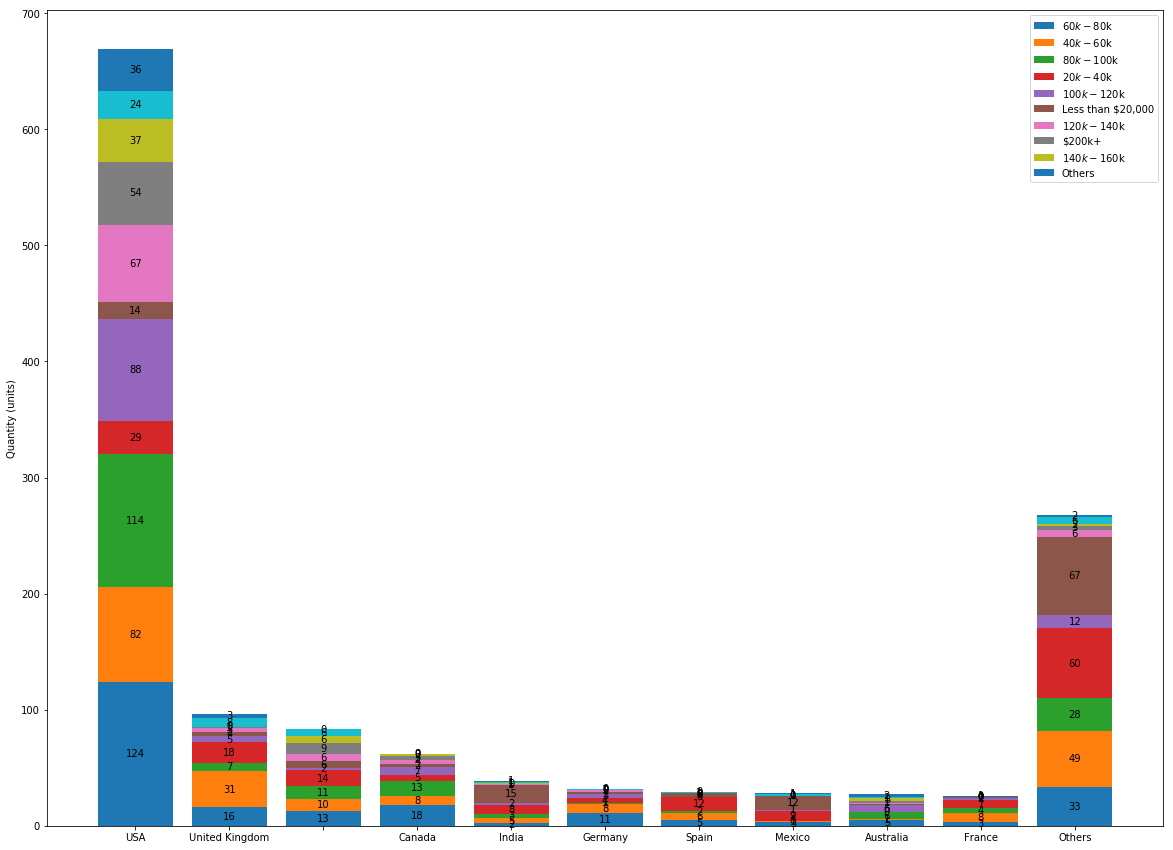

In [53]:
plt.figure(figsize=(20, 15))

series_labels = category2
category_labels = category1
stacked_bar(
    plot_arrays, 
    series_labels, 
    category_labels=category_labels, 
    show_values=True, 
    value_format="{:}",
    y_label="Quantity (units)"
)

plt.show()